# Forecasting Google Stock with Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import and make the date column the index
df = pd.read_csv('Google_Stock.csv', index_col = 'Date')

# Create a datetidex
df.index = pd.to_datetime(df.index)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.323915,44659000.0
2004-08-20,54.322689,0.710922,6.739913,22834300.0
2004-08-23,54.869377,3.729433,-1.243144,18256100.0
2004-08-24,52.597363,6.417469,-6.074187,15247300.0
2004-08-25,53.164113,1.886792,1.169811,9188600.0


Let's create a 'Label' column which will contain the values which we are trying to predict. We will use the **.shift()** method to shift the values in the 'Adj. Close' column the number of spaces specified in the 'forecast_out' variable.

The image below showa an example of how the **.shift()** method works:

![](shift_example.png)

In [3]:
# Number of days to forecast
forecast_out = 365

# Shift 'forecast' up the amout of forecast_out in order to predict that many days into the future
df['Label'] = df['Adj. Close'].shift(-forecast_out)

df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,Label
Date,,,,,
2004-08-19,50.322842,3.712563,0.323915,44659000.0,216.999908
2004-08-20,54.322689,0.710922,6.739913,22834300.0,201.512048
2004-08-23,54.869377,3.729433,-1.243144,18256100.0,198.633162
2004-08-24,52.597363,6.417469,-6.074187,15247300.0,191.368235
2004-08-25,53.164113,1.886792,1.169811,9188600.0,193.146224


Next we will remove the rows where the the 'Label' column was made NaN by the .shift() method and save them to forecast with later.

In [4]:
X = df.drop(['Label'], 1)

# Save the most recent 'forecast_out' days to forecast with later
X_lately = X[-forecast_out:]

# Remove the most recent 'forecast_out' days where we don't have labels
X = X[:-forecast_out]

# labels
y = df['Label'][:-forecast_out]

Here we will partition up the training and testing sets as well as fit our model.

In [5]:
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression

# partitioning up the training/testing data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

# regressor
regr = LinearRegression()

# Train the regressor
regr.fit(X_train, y_train)

# Calculate the accuracy of the model (squared error in this case)
accuracy = regr.score(X_test, y_test)

accuracy

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


0.86837210719591029

### Make a plot of the model's forecast

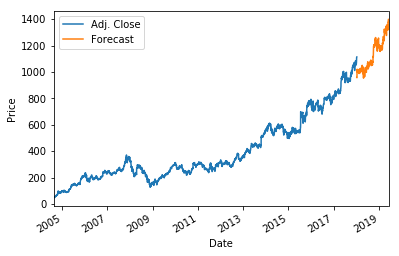

In [6]:
from pandas.tseries.offsets import BDay # This will allow us to get the next business
import matplotlib.pyplot as plt

# Predoct on X_lately to make the forecasted predictions
forecast_set = regr.predict(X_lately)

# The first buisness day after the last day in the dataset
first_forecast_day = df.index[-1] + BDay()

# Fill in the rest of the days for the forecast index
forecast_index = [first_forecast_day]
for i in range(1, forecast_out):
    forecast_index.append(forecast_index[i-1]+BDay())

# Combine the forecast index with the forecast values
forecast = pd.Series(forecast_set, index = forecast_index)

# plot
df['Adj. Close'].plot()
forecast.plot()
plt.legend(['Adj. Close', 'Forecast'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()